Dataset Google Drive Link : https://drive.google.com/drive/folders/12uUTIZvTCCKIfzaHmcERB8MS7wi2VA9Y?usp=drive_link


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install --upgrade keras
!pip install --upgrade tensorflow

In [ ]:
# Importing various libraries

import numpy as np                        # Arrays
import pandas as pd                       # DataFrames
import tensorflow as tf                   # CNN
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  MaxPooling2D, ZeroPadding2D,Conv2D
from tensorflow.keras.layers import Dense, Input, Activation, Flatten,add,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras.applications.mobilenet import MobileNet
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
!pip install keract
from keract import get_activations

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import keract

import os
from PIL import Image

import pylab as pl

from collections import OrderedDict

# Mounting drive to place the data

drive.mount('/content/drive')
%cd /content/drive/MyDrive/FER

# Saving constant values

emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/FER


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255
                                  #  ,featurewise_center=False, samplewise_center=False,featurewise_std_normalization=False, samplewise_std_normalization=False,zca_whitening=False, zca_epsilon=1e-06 , brightness_range=None, fill_mode='nearest', cval=0.0
                                   ,rotation_range=0.2
                                  #  , width_shift_range=0.2
                                  #  , height_shift_range=0.1
                                  #  , shear_range=0.1
                                  #  , zoom_range=0.1
                                  #  ,channel_shift_range=0.1
                                  #  ,horizontal_flip=True
                                  #  , vertical_flip=True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 200
train_generator = train_datagen.flow_from_directory("data/train",target_size=(224, 224),color_mode='rgb',batch_size= batch_size,class_mode='categorical',seed=1,shuffle = False)
test_generator = test_datagen.flow_from_directory("data/test",target_size=(224, 224),color_mode='rgb',batch_size=batch_size,class_mode='categorical',seed=1, shuffle = False)



Found 2441 images belonging to 7 classes.
Found 611 images belonging to 7 classes.


In [ ]:
number_of_epochs = 50

im1 =Input(shape=(224,224,3))
y=MobileNet(input_shape=(224,224,3), include_top=False, weights='imagenet', input_tensor=im1, classes=7,)
for layer in y.layers:
    layer.trainable =False
x=Flatten()(y.output)
out = Dense(7, activation='softmax')(x)
model = Model(inputs=[im1],outputs= out)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

penalty = 1
regularizer = tf.keras.regularizers.l2(penalty)

for layer in model.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)
    for attr in ['bias_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)


In [ ]:

opt=optimizers.Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history=model.fit(
        train_generator,
        steps_per_epoch = train_generator.samples // train_generator.batch_size + 1,
        epochs=number_of_epochs,
        validation_data = test_generator
        )

train_acc = str(model.evaluate(train_generator)[1])
test_acc = str(model.evaluate(test_generator)[1])
print("Training accuracy : "+ train_acc)
print("Testing accuracy : "+ test_acc)

Epoch 1/50


In [ ]:
model.save('FER45%')
model = tf.keras.models.load_model('FER45%')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

13/13 [==============================] - 37s 3s/step
train_accuracy 0.9995903318312167
          Angry  Disgust  Fear  Happy  Sad  Surprise  Neutral
Angry       344        0     0      0    0         0        0
Disgust       0      340     0      0    0         0        0
Fear          0        0   351      0    0         0        0
Happy         0        0     0    353    0         0        0
Sad           0        0     0      0  339         0        0
Surprise      0        0     0      0    0       355        0
Neutral       0        0     1      0    0         0      358
4/4 [==============================] - 3s 671ms/step
0.4353518821603928
          Angry  Disgust  Fear  Happy  Sad  Surprise  Neutral
Angry        28       11    14      4   16        11        8
Disgust      17       64     1      3    4         5        2
Fear         16        4    23     13    1        13       15
Happy        13        2     8     47    7         1        5
Sad          16        7     8     

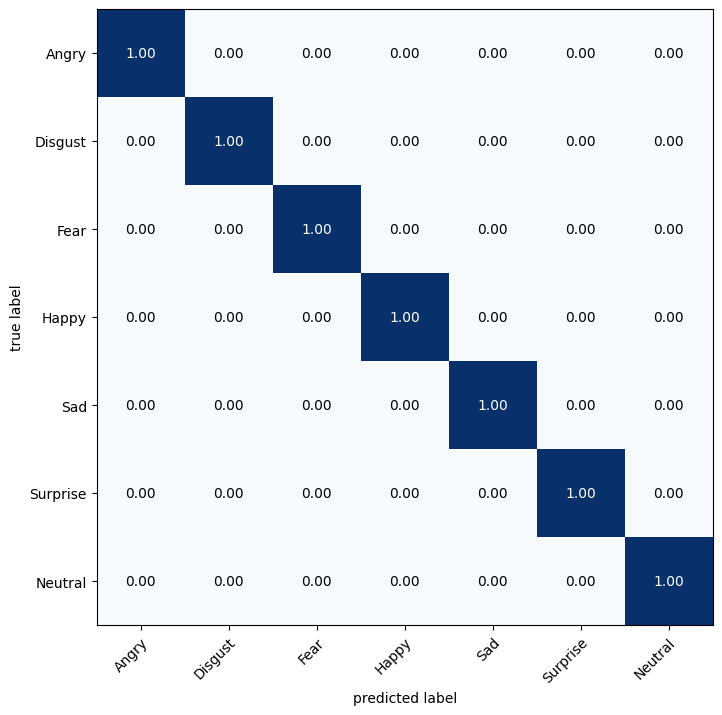

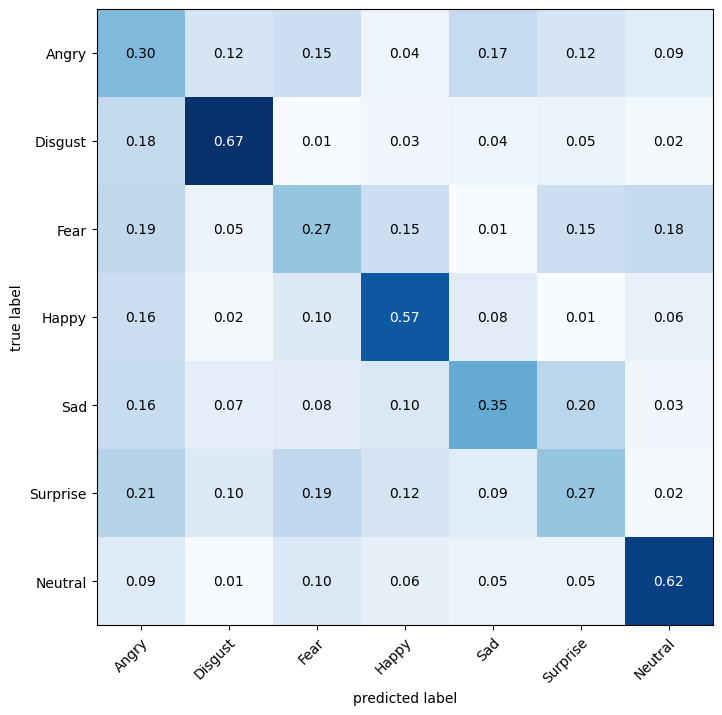

In [ ]:
train_prob = model.predict(train_generator)
train_pred = np.argmax(train_prob, axis=1)
train_real = train_generator.classes
train_accuracy = np.mean(train_pred == train_real)
print("train_accuracy",train_accuracy)

conf_mat = confusion_matrix(train_real, train_pred)
print(pd.DataFrame(conf_mat, columns=emotions.values(), index=emotions.values()))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

test_prob = model.predict(test_generator)
test_pred = np.argmax(test_prob, axis=1)
test_real = test_generator.classes
test_accuracy = np.mean(test_pred == test_real)
print(test_accuracy)

conf_mat = confusion_matrix(test_real, test_pred)
print(pd.DataFrame(conf_mat, columns=emotions.values(), index=emotions.values()))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

print(classification_report(train_real, train_pred, target_names=emotions.values()))
print(classification_report(test_real, test_pred, target_names=emotions.values()))

In [ ]:
model.evaluate(train_generator, steps = train_generator.samples // train_generator.batch_size)
model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

3/3 [==============================] - 3s 1s/step - loss: 5721.1606 - accuracy: 0.4317


[5721.16064453125, 0.43166667222976685]